In [25]:
% matplotlib inline

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report

#### Cargamos los datos que deseamos evaluar, los separamos y transformamos en float e int32

In [26]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
X = X.astype(np.float32)
y = y.astype(np.int32) # al ser clases y no valor continuo podemos utilizar int32

In [27]:
print "X.shape -> {}".format(X.shape)
print "y.shape -> {}".format(y.shape)

X.shape -> (150, 4)
y.shape -> (150,)


#### Lasagne ya realiza una división interna de los datos para evaluación y testeo, pero esto lo hacemos para realizar pruebas propias más adelante

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print "X_test.shape -> {}".format(X_test.shape)
print "X_train.shape -> {}".format(X_train.shape)


X_test.shape -> (38, 4)
X_train.shape -> (112, 4)


In [40]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        #('hidden2', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # parametros de las capas
    input_shape=(None, 4),  # la entrada consta de  Sepal length, Sepal width, Petal length, Petal width
    hidden_num_units=100, 
    #hidden2_num_units=80,
    output_num_units=3,  # 3 diferentes clases
    output_nonlinearity=lasagne.nonlinearities.softmax,
    # método de optimización
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=False,  # Esto indica si estamos trabajando con un problema de regresion o no.
    max_epochs=500,  # y cuantos epochs deseamos entrenar
    verbose=1
    )

net1.fit(X_train, y_train)

  InputLayer        	(None, 4)           	produces       4 outputs
  DenseLayer        	(None, 100)         	produces     100 outputs
  DenseLayer        	(None, 3)           	produces       3 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    2.303113  |    1.418044  |     1.624148  |     34.78%  |  0.0s
     2  |    1.384973  |    1.204108  |     1.150206  |     34.78%  |  0.0s
     3  |    1.206083  |    1.207558  |     0.998778  |     34.78%  |  0.0s
     4  |    1.216052  |    1.157695  |     1.050408  |     34.78%  |  0.0s
     5  |    1.167045  |    1.073490  |     1.087150  |     65.22%  |  0.0s
     6  |    1.082316  |    0.958731  |     1.128905  |     65.22%  |  0.0s
     7  |    0.968849  |    0.859914  |     1.126682  |     65.22%  |  0.0s
     8  |    0.872592  |    0.802032  |     1.087977  |     86.96%  |  0.0s
     9  |    0.817745  |    0.761534  

NeuralNet(X_tensor_type=<function matrix at 0x44a7c80>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x4ed0b50>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x4ed0ad0>,
     eval_size=0.2, hidden_num_units=100, input_shape=(None, 4),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x4ed1230>, max_epochs=500,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<theano.tensor.nnet.nnet.Softmax object at 0x473f850>,
     output_num_units=3, regression=False,
     update=<function nesterov_momentum at 0x4ecade8>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y_tensor_type=TensorType(int32, vector))

In [41]:
def plot_confusion_matrix(y_pred, y, title, method=None):
    """
    """
    plt.imshow(confusion_matrix(y, y_pred), cmap=plt.cm.binary, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.savefig(title +'_NN.png')
    plt.show()

0.973684210526
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.92      1.00      0.96        11
          2       1.00      0.92      0.96        12

avg / total       0.98      0.97      0.97        38



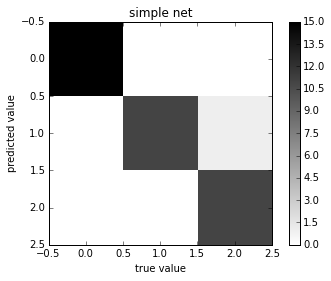

In [46]:
from sklearn.metrics import accuracy_score
y_pred = net1.predict(X_test)
print accuracy_score(y_pred, y_test)
print classification_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'simple net')

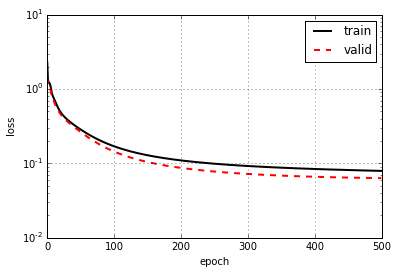

In [43]:
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.plot(train_loss, '-k', linewidth=2, label="train")
plt.plot(valid_loss, '--r', linewidth=2, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

In [44]:
clf = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train, y_train)

0.289473684211
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.29      1.00      0.45        11
          2       0.00      0.00      0.00        12

avg / total       0.08      0.29      0.13        38



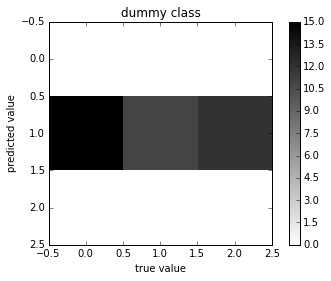

In [45]:
y_pred = clf.predict(X_test)
print accuracy_score(y_pred, y_test)
print classification_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'dummy class')